In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [2]:
column_names = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

train = pd.read_csv('KDDTrain+.txt', header=0, names=column_names)
train = train.drop('level',axis=1)

train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [3]:
column_names = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

test = pd.read_csv('KDDTest+.txt', header=0, names=column_names)
test = test.drop('level',axis=1)

test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [5]:
train.describe().T



,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [6]:
train.describe(include="object")

,protocol_type,service,flag,attack
count,125972,125972,125972,125972
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102688,40338,74944,67342


In [7]:
print("Taille initial du dataset:",train.shape)

Taille initial du dataset: (125972, 42)


In [8]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [9]:
# Vérifier les lignes dupliquées dans le DataFrame
duplicates = train[train.duplicated()]

# Afficher le nombre total de lignes dupliquées
print(f"Nombre total de lignes dupliquées : {len(duplicates)}")


Nombre total de lignes dupliquées : 0


In [10]:
# Nombre de valeurs uniques dans chaque colonne
print(train.nunique())

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [11]:
# affichage des valeurs pour chaque colonne
for column in train.columns:
    unique_values = train[column].unique()
    print(f"Valeurs uniques pour la colonne {column}: {unique_values}")

Valeurs uniques pour la colonne duration: [    0  5607   507 ...  5430 11680   679]
Valeurs uniques pour la colonne protocol_type: ['udp' 'tcp' 'icmp']
Valeurs uniques pour la colonne service: ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
Valeurs uniques pour la colonne flag: ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
Valeurs uniques pour la colonne src_bytes: [  146     0   232 ...  2816 11466  235

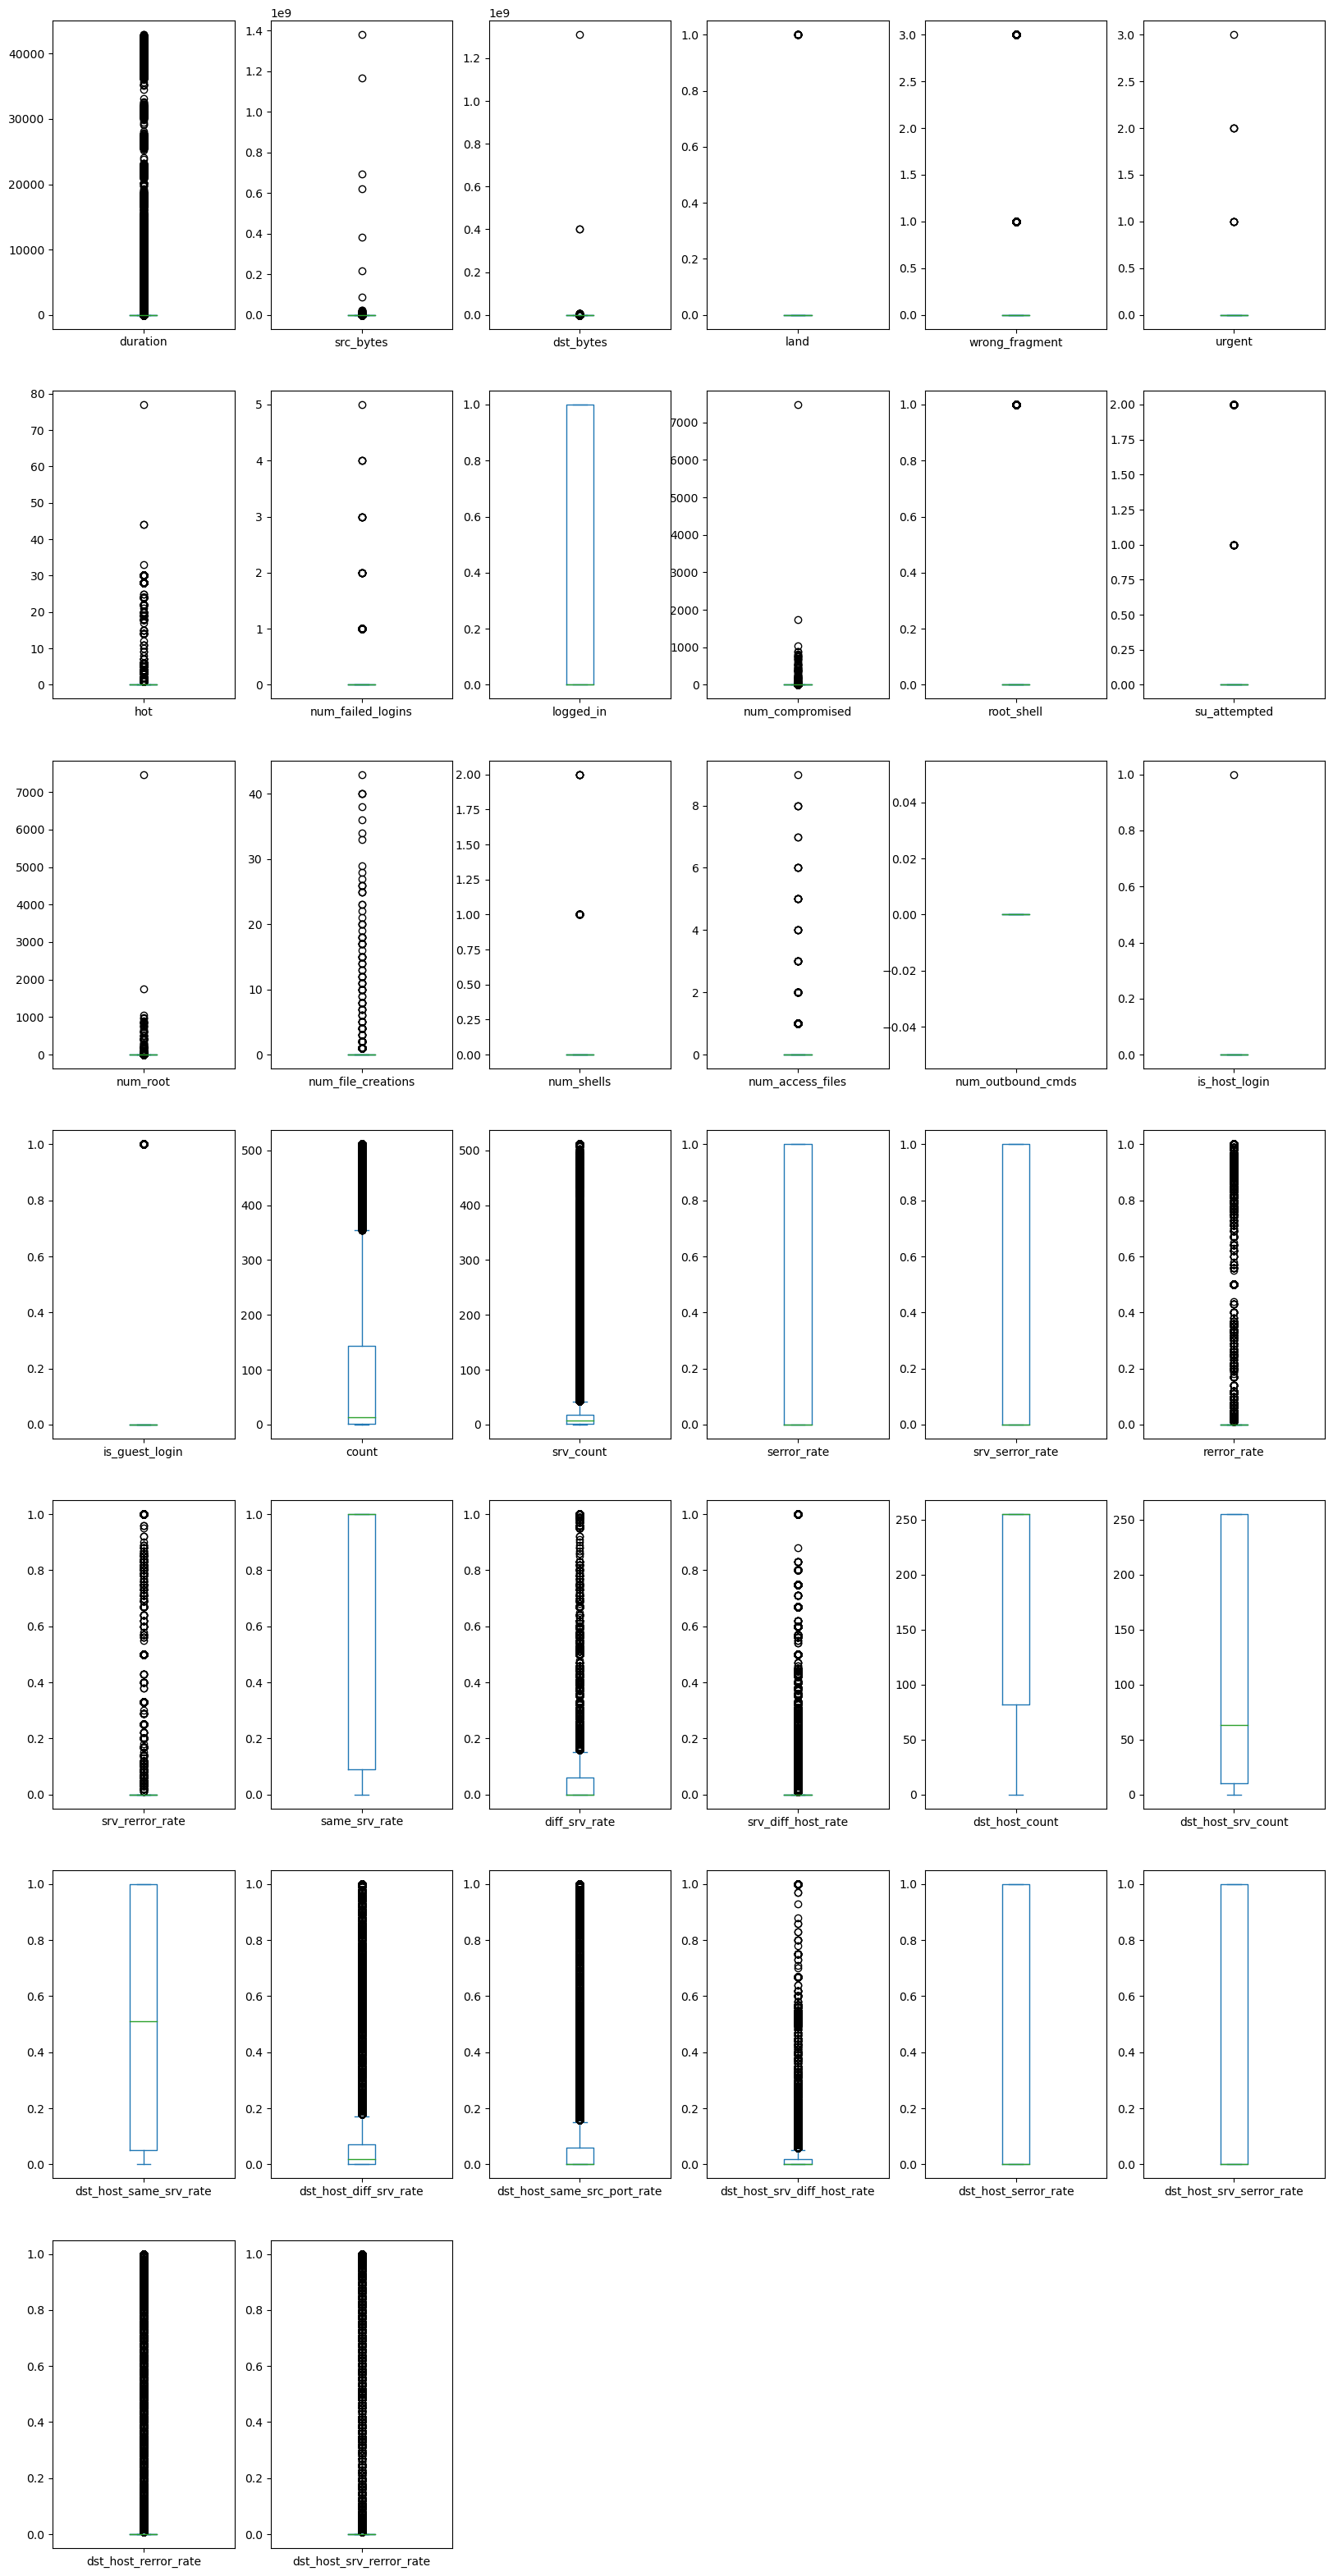

In [12]:
train.plot(kind='box', subplots=1, layout=(7, 6), figsize=(20, 40))
plt.show()

In [4]:
def detect_outliers_iqr(data, threshold=1.5):
    outliers_info = {}

    for column in data.columns:
        if data[column].dtype in [int, float]:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1

            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
            
            if not column_outliers.empty:
                num_outliers = len(column_outliers)
                percent_outliers = (num_outliers / len(data)) * 100
                outliers_info[column] = {"outliers_df": column_outliers, "num_outliers": num_outliers, "percent_outliers": percent_outliers}

    return outliers_info

outliers_info = detect_outliers_iqr(train)

# Afficher les colonnes avec des valeurs aberrantes, le nombre de valeurs aberrantes, et le pourcentage de valeurs aberrantes
for column, info in outliers_info.items():
    print(f"Outliers in column '{column}': {info['num_outliers']} outliers ({info['percent_outliers']:.2f}%)")
    #print(info['outliers_df'].head())
    #print("\n")


Outliers in column 'rerror_rate': 16190 outliers (12.85%)
Outliers in column 'srv_rerror_rate': 16206 outliers (12.86%)
Outliers in column 'diff_srv_rate': 7788 outliers (6.18%)
Outliers in column 'srv_diff_host_rate': 28399 outliers (22.54%)
Outliers in column 'dst_host_diff_srv_rate': 10550 outliers (8.37%)
Outliers in column 'dst_host_same_src_port_rate': 25051 outliers (19.89%)
Outliers in column 'dst_host_srv_diff_host_rate': 11682 outliers (9.27%)
Outliers in column 'dst_host_rerror_rate': 22794 outliers (18.09%)
Outliers in column 'dst_host_srv_rerror_rate': 19357 outliers (15.37%)


In [ ]:
#train.drop(['rerror_rate'], axis=1, inplace=True)


<Axes: xlabel='attack', ylabel='count'>

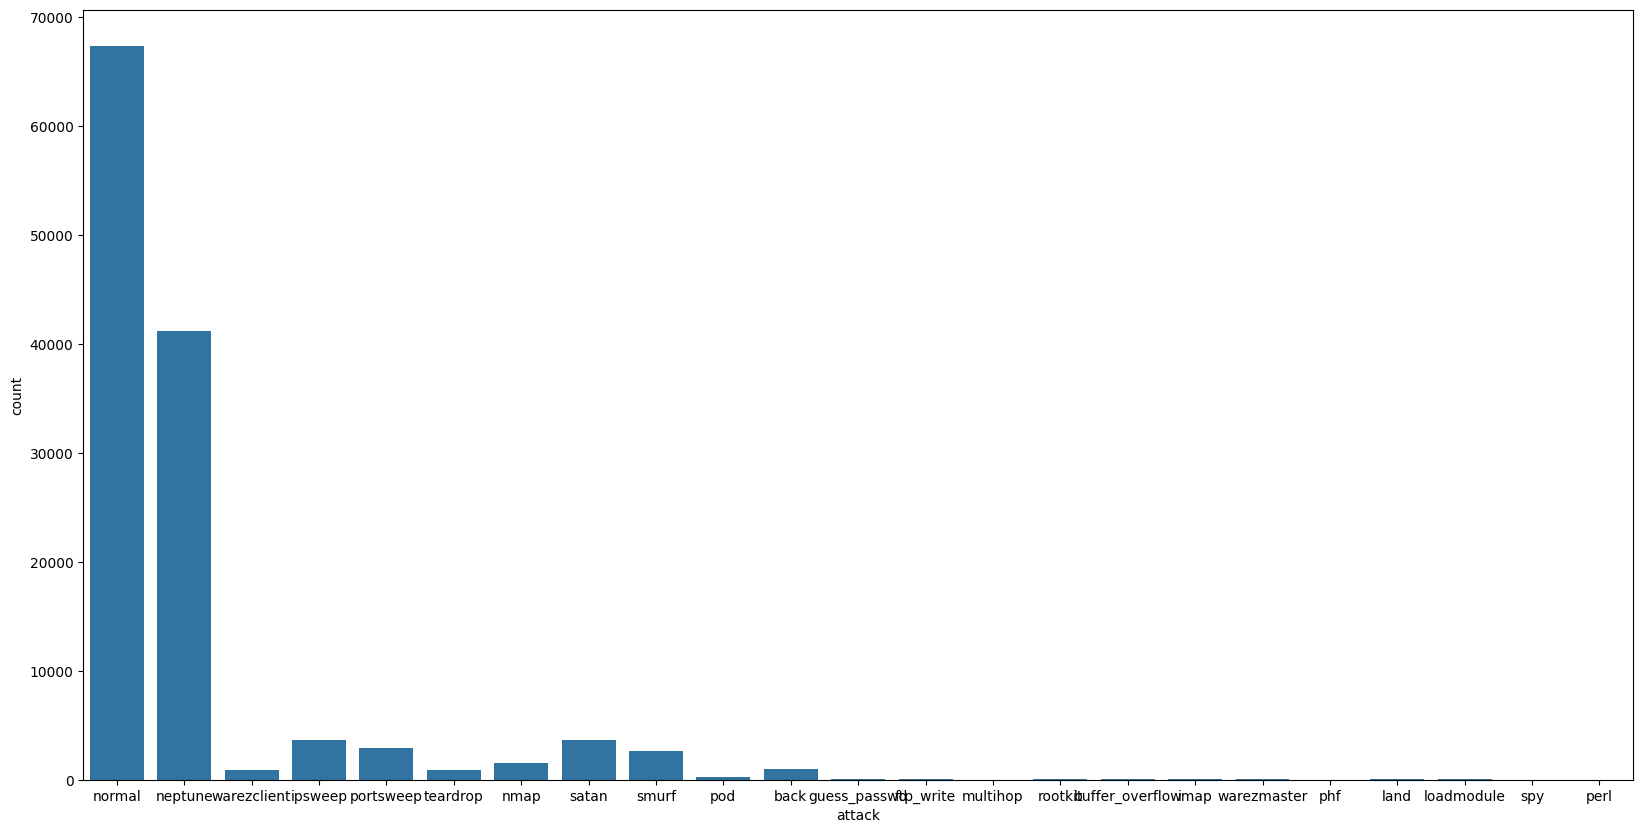

In [12]:
plt.figure(figsize=(20, 10))
sns.countplot(x=train['attack'])

In [5]:
# changing attack labels to their respective attack class
def change_label(train):
  train.attack.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  train.attack.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  train.attack.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  train.attack.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

change_label(train)
train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,Dos
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,Dos


In [6]:
# changing attack labels to their respective attack class test
def change_label(test):
  test.attack.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  test.attack.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  test.attack.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  test.attack.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

change_label(test)
test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,Dos
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,Probe
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,Probe
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


In [7]:
train['attack'].unique()

array(['normal', 'Dos', 'R2L', 'Probe', 'U2R'], dtype=object)

In [8]:
train.attack.value_counts()

attack
normal    67342
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

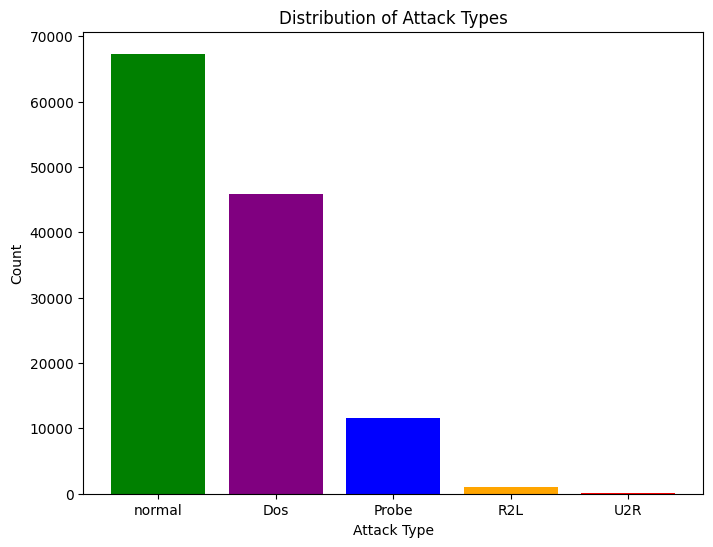

In [9]:
data = {'attack': ['normal', 'Dos', 'Probe', 'R2L', 'U2R'],
        'count': [67342, 45927, 11656, 995, 52]}

df_attack_count = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(df_attack_count['attack'], df_attack_count['count'], color=['green', 'purple', 'blue', 'orange', 'red'])
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()


In [10]:
category_mapping_attack = {
     'normal':0,
     'Dos':1,
     'R2L':2,
      'Probe':3,
      'U2R':4
 }
train['attack'] = train['attack'].map(category_mapping_attack)
train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1


In [11]:
category_mapping_attack = {
     'normal':0,
     'Dos':1,
     'R2L':2,
      'Probe':3,
      'U2R':4
 }
test['attack'] = test['attack'].map(category_mapping_attack)
test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,3
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,3
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,0


In [12]:
# Nombre de valeurs uniques dans chaque colonne string 
print(f"Nombre de valeurs uniques dans protocol_type : {train.protocol_type.nunique()} ")
print(f"Nombre de valeurs uniques dans service :{train.service.nunique()}")
print(f"Nombre de valeurs uniques dans flag :{train.flag.nunique()}")

# Convert specified columns to 'category' data type
categorical_columns = ['protocol_type', 'service', 'flag']
train[categorical_columns] = train[categorical_columns].astype('category')
# Apply Label Encoding to convert to numerical values
label_encoder = LabelEncoder()
train[categorical_columns] = train[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))
# Convert label-encoded categorical columns to binary vectors (One-Hot Encoding)
train_encoded = pd.get_dummies(train, columns=categorical_columns)
train_encoded.info()
train_encoded.head()

Nombre de valeurs uniques dans protocol_type : 3 
Nombre de valeurs uniques dans service :70
Nombre de valeurs uniques dans flag :11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Columns: 123 entries, duration to flag_10
dtypes: bool(84), float64(15), int64(24)
memory usage: 47.6 MB


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_1,flag_2,flag_3,flag_4,flag_5,flag_6,flag_7,flag_8,flag_9,flag_10
0,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
3,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False


<div style="background-color: #EEBB1D; padding: 10px; border: 1px solid #f1c40f;">
    
Il est observé que la colonne "service" de notre ensemble de données présente 70 valeurs uniques. Lorsque nous appliquons la technique de One-Hot Encoding à cette colonne, cela se traduit par la création de 70 nouvelles colonnes, chacune représentant une valeur unique dans la colonne d'origine. Cela augmenterait considérablement le nombre total d'entrées dans notre ensemble de données, passant ainsi à 123 colonnes après l'encodage. Cette expansion pourrait introduire une complexité accrue dans l'analyse du jeu de données, car la multiplication des colonnes peut rendre l'ensemble de données plus difficile à interpréter et à manipuler.    </div>

<div style="background-color: red; padding: 10px; border: 1px solid #f1c40f;">
Afin de résoudre ce défi de dimensionnalité tout en conservant l'information contenue dans la colonne "service", nous avons décidé d'opter pour la méthode de Label Encoding. 
</div>

In [13]:
# Convert specified columns to 'category' data type
categorical_columns = ['protocol_type', 'service', 'flag']
test[categorical_columns] = test[categorical_columns].astype('category')
# Apply Label Encoding to convert to numerical values
label_encoder = LabelEncoder()
test[categorical_columns] = test[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  int32  
 2   service                      22543 non-null  int32  
 3   flag                         22543 non-null  int32  
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [23]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  int32  
 2   service                      125972 non-null  int32  
 3   flag                         125972 non-null  int32  
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [14]:
#Normalisation train
from sklearn.preprocessing import StandardScaler

# Sélectionner toutes les colonnes sauf la colonne 'attack'
features = train.columns[:-1]
# Créer un objet StandardScaler
scaler = StandardScaler()

# Appliquer la normalisation aux données sauf la colonne 'attack'
trainNormlize = scaler.fit_transform(train[features])
trainNormlized = pd.concat([pd.DataFrame(trainNormlize, columns=features), train['attack'].reset_index(drop=True)], axis=1)


In [15]:
#Normalisation test
from sklearn.preprocessing import StandardScaler

# Sélectionner toutes les colonnes sauf la colonne 'attack'
features = test.columns[:-1]

# Créer un objet StandardScaler
scaler = StandardScaler()

# Appliquer la normalisation aux données sauf la colonne 'attack'
testNormlize = scaler.fit_transform(test[features])
testNormlized = pd.concat([pd.DataFrame(testNormlize, columns=features), test['attack'].reset_index(drop=True)], axis=1)
testNormlized.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,-0.155538,-0.176307,0.934002,-1.830131,-0.021989,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,-1.250274,-1.397261,-0.138373,-0.431868,-0.229986,-0.358127,-0.352758,1.980007,1.929318,1
1,-0.154116,-0.176307,-0.882210,0.662209,0.005472,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.489856,0.002876,-0.228987,1.559859,0.004223,-0.358127,-0.352758,-0.602670,-0.565432,0
2,-0.155538,-2.695000,-1.301336,0.662209,-0.021946,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.749292,0.898046,-0.410214,2.833257,3.048941,-0.358127,-0.352758,-0.602670,-0.565432,3
3,-0.154827,-0.176307,1.632546,-1.518588,-0.021989,-0.096191,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.489856,-0.685716,0.360004,-0.333914,0.004223,-0.358127,-0.352758,1.540952,1.205841,3
4,-0.155538,-0.176307,-0.672647,0.662209,-0.021424,0.587149,-0.017624,-0.059105,-0.01946,-0.113524,...,1.022035,0.898046,-0.410214,-0.399216,0.121328,-0.321515,-0.352758,-0.602670,-0.565432,0


In [16]:
# La  matrice de corrélation train 
# Exclure les colonnes non numériques 
numerical_data = trainNormlized.select_dtypes(include='number')

# Calculer la matrice de corrélation
correlation_matrix = numerical_data.corr()

# Afficher la matrice de corrélation
correlation_matrix


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
duration,1.000000,0.038241,0.092857,-0.063389,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,...,-0.109777,-0.116006,0.254195,0.228737,-0.026670,-0.064949,-0.064361,0.173815,0.199023,0.170237
protocol_type,0.038241,1.000000,0.029993,0.093669,-0.000974,-0.000608,-0.001757,0.169534,-0.000965,-0.011857,...,0.103918,0.001701,0.131380,-0.209105,-0.356183,-0.079399,-0.077926,-0.015435,-0.046938,-0.286527
service,0.092857,0.029993,1.000000,-0.304011,-0.001631,0.003596,-0.009952,0.084404,0.010980,-0.064067,...,-0.407702,-0.452702,0.284071,-0.111163,-0.156213,0.281632,0.277592,0.150666,0.148403,0.194196
flag,-0.063389,0.093669,-0.304011,1.000000,-0.008114,-0.004096,-0.010373,0.067215,0.005811,0.068438,...,0.582695,0.630126,-0.283606,0.195689,0.073775,-0.443438,-0.443223,-0.683310,-0.718778,-0.434516
src_bytes,0.070737,-0.000974,-0.001631,-0.008114,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,...,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,0.015669
dst_bytes,0.034878,-0.000608,0.003596,-0.004096,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,...,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,0.010723
land,-0.001553,-0.001757,-0.009952,-0.010373,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,...,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,0.000951
wrong_fragment,-0.009866,0.169534,0.084404,0.067215,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,...,-0.045241,-0.048734,0.059796,0.037177,-0.016252,-0.051917,-0.055918,0.028890,-0.033682,0.034046
urgent,0.003830,-0.000965,0.010980,0.005811,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,...,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,0.000473
hot,0.000705,-0.011857,-0.064067,0.068438,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,...,-0.051865,-0.036294,-0.012293,-0.034536,-0.024715,-0.058223,-0.058215,-0.030555,-0.031670,0.007354


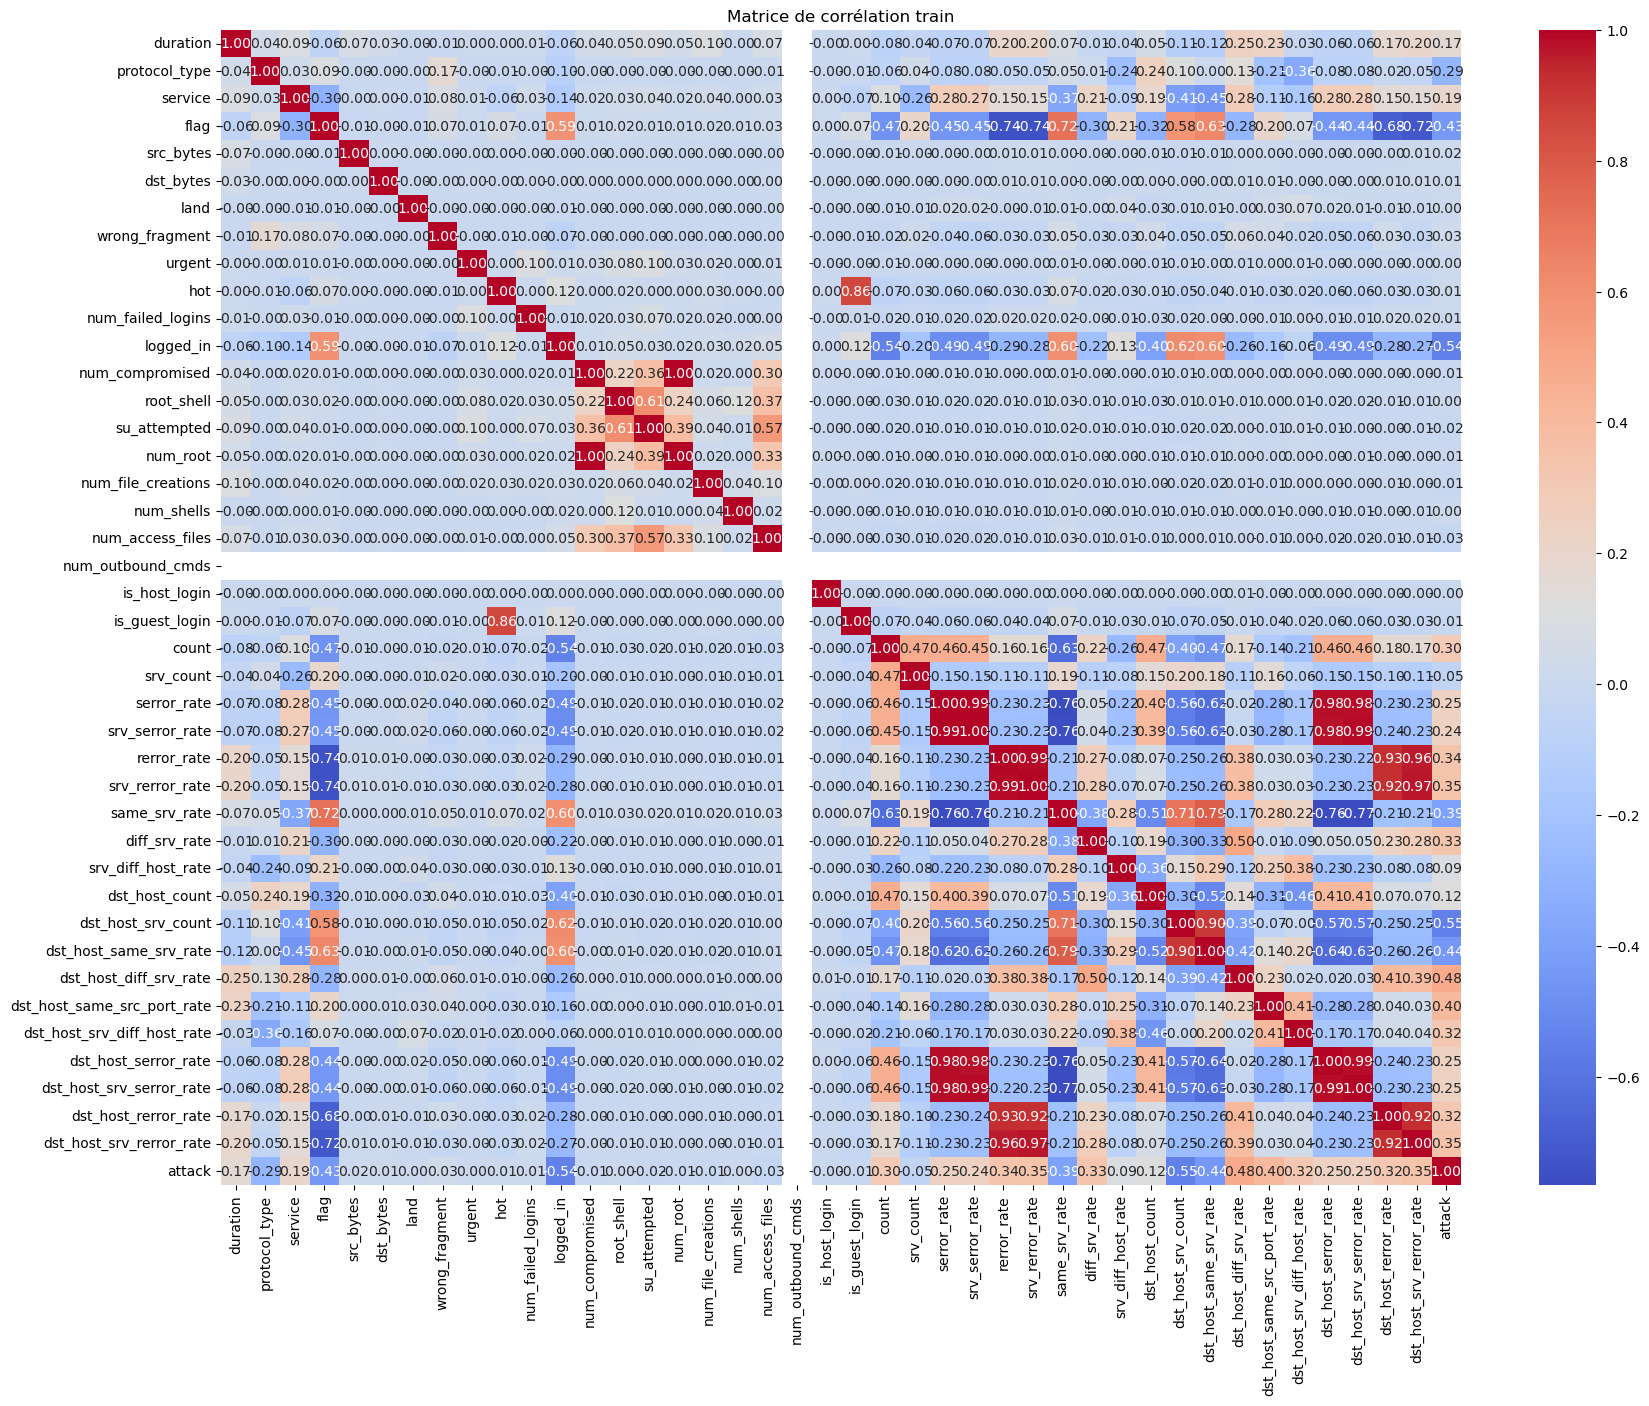

In [26]:
import seaborn as sns
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation train")
plt.show()

In [17]:
# La  matrice de corrélation test
# Exclure les colonnes non numériques 
numerical_data = testNormlized.select_dtypes(include='number')

# Calculer la matrice de corrélation
correlation_matrix = numerical_data.corr()

# Afficher la matrice de corrélation
correlation_matrix

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
duration,1.000000,-0.023279,0.173353,0.066872,0.002673,0.078951,-0.002741,-0.009193,-0.000048,-0.004689,...,0.010068,0.004976,0.016745,-0.052328,-0.024127,0.093244,0.107696,-0.029364,-0.055950,0.007922
protocol_type,-0.023279,1.000000,0.164609,0.116752,-0.004244,-0.016351,-0.003107,0.058529,-0.003431,-0.020015,...,0.092414,0.041265,0.089642,-0.077068,-0.253646,-0.063443,-0.062194,-0.099082,-0.099690,-0.099468
service,0.173353,0.164609,1.000000,-0.327735,-0.029378,-0.029526,-0.018011,0.020849,0.029645,-0.080363,...,-0.379511,-0.447560,0.228442,-0.138868,-0.178539,0.213611,0.232742,0.309925,0.290527,0.359991
flag,0.066872,0.116752,-0.327735,1.000000,0.009958,0.059037,-0.010292,0.039140,0.012886,0.069996,...,0.620357,0.703776,-0.229235,0.246308,0.124752,-0.147645,-0.133831,-0.839053,-0.912358,-0.376316
src_bytes,0.002673,-0.004244,-0.029378,0.009958,1.000000,0.053634,-0.000388,-0.001247,-0.000333,0.002631,...,-0.014238,-0.006797,-0.002920,0.008954,0.004873,-0.007700,-0.007495,-0.010350,-0.009955,0.014517
dst_bytes,0.078951,-0.016351,-0.029526,0.059037,0.053634,1.000000,-0.001708,-0.005726,0.017556,0.027912,...,0.037875,0.041172,-0.030931,-0.019016,0.002875,-0.030167,-0.020415,-0.054110,-0.051584,-0.067533
land,-0.002741,-0.003107,-0.018011,-0.010292,-0.000388,-0.001708,1.000000,-0.001042,-0.000343,-0.002001,...,-0.021652,-0.001278,-0.005176,0.025518,0.090885,0.035814,0.042375,-0.010492,-0.009965,0.001388
wrong_fragment,-0.009193,0.058529,0.020849,0.039140,-0.001247,-0.005726,-0.001042,1.000000,-0.001150,-0.006710,...,-0.050791,-0.015481,0.001490,0.070612,0.061632,-0.009630,-0.020850,-0.023883,-0.033420,-0.034370
urgent,-0.000048,-0.003431,0.029645,0.012886,-0.000333,0.017556,-0.000343,-0.001150,1.000000,0.061980,...,-0.019608,-0.006616,0.008989,0.002596,0.011191,-0.004698,-0.006778,-0.009969,-0.001810,0.057234
hot,-0.004689,-0.020015,-0.080363,0.069996,0.002631,0.027912,-0.002001,-0.006710,0.061980,1.000000,...,-0.041790,-0.029874,0.016771,-0.033414,-0.010386,-0.025540,-0.036632,-0.035841,-0.058155,0.055130


In [18]:
#num_outbound_cmds ne présente pas de corrélation significative avec la fonction cible 
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

# FEATURE SELECTION

In [19]:
X_train = train.drop('attack', axis=1)  # Features
Y_train= train['attack']  # Target variable

In [20]:
X_test = test.drop('attack', axis=1)  # Features
Y_test= test['attack']  # Target variable

In [31]:
?SelectPercentile

Object `SelectPercentile` not found.


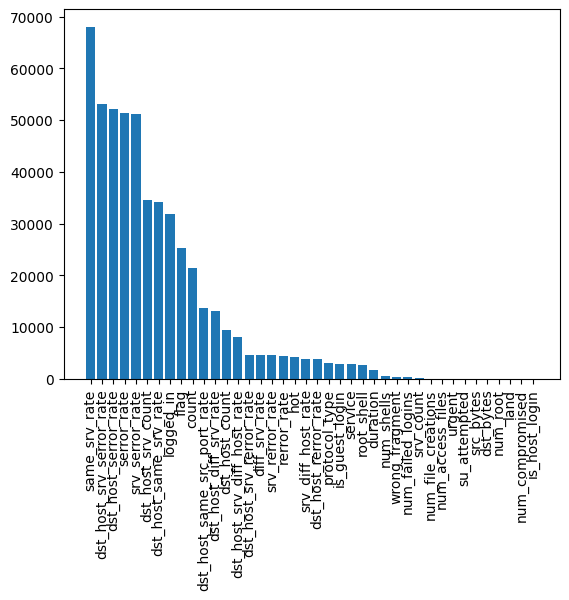

In [21]:
from sklearn.feature_selection import SelectPercentile, f_classif
selector = SelectPercentile(f_classif, percentile=50)
X_train_selected = selector.fit_transform(X_train, Y_train)
selected_features = X_train.columns[selector.get_support()]
#print("Selected Features:", selected_features)
feature_scores = list(zip(selector.scores_, X_train.columns))
sorted_feature_scores = sorted(feature_scores, reverse=True)
num_list = []
col_list = []
for i in range(40):
    num_list.append((sorted_feature_scores[i])[0])
    col_list.append((sorted_feature_scores[i])[1])


plt.bar(col_list, num_list)
plt.xticks(rotation=90)
plt.show()
X_train_selected = X_train[selected_features]


In [22]:
X_train.shape


(125972, 40)

In [24]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

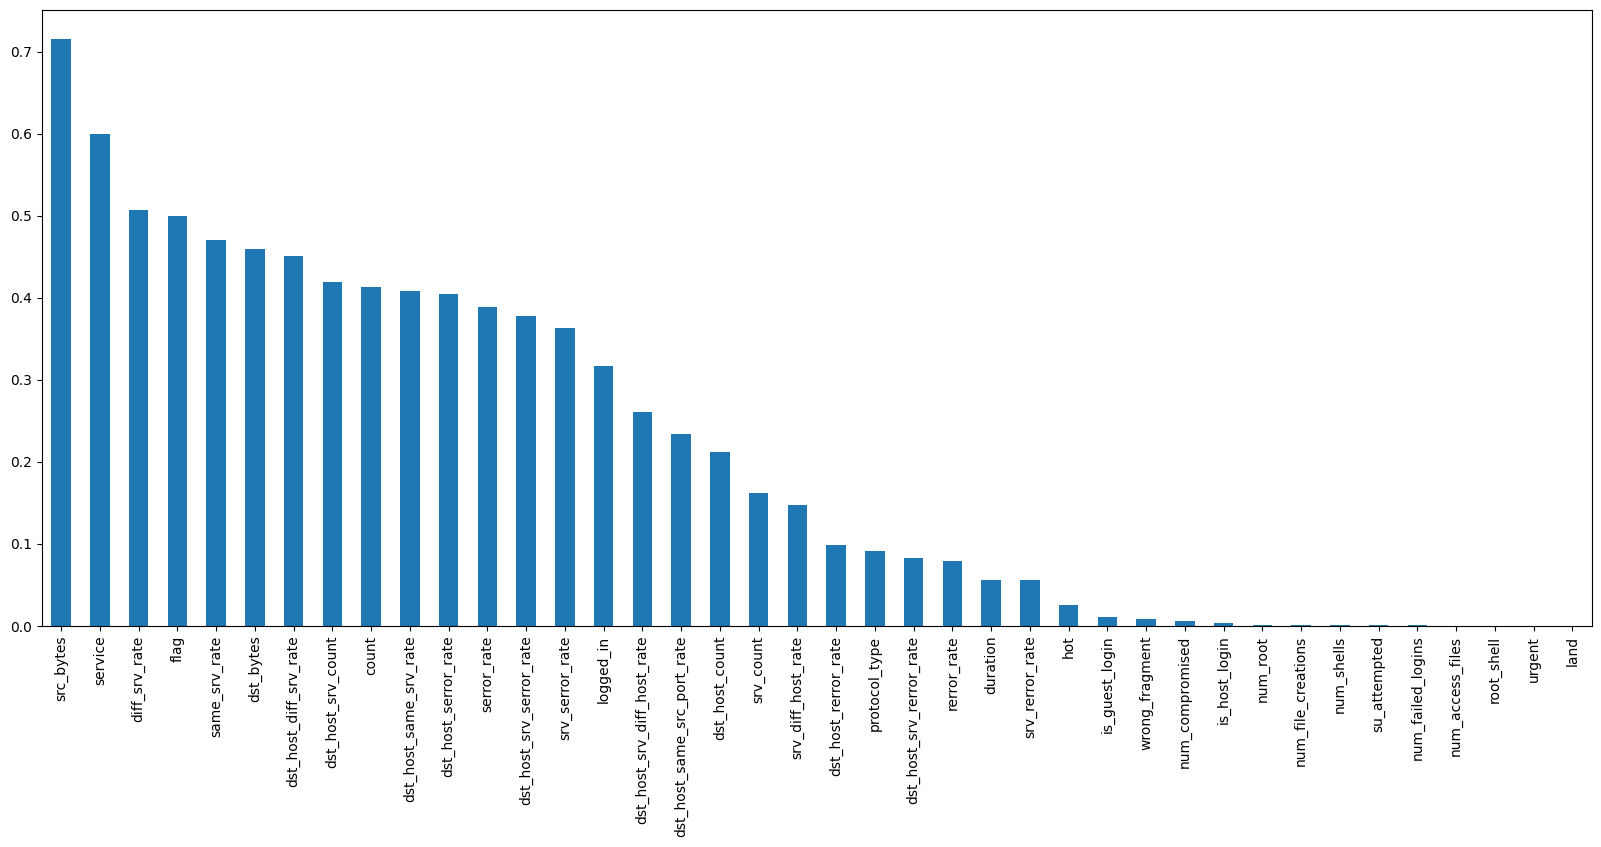

In [33]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8)); 


In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression



# Create a feature selector
selector = RFE(estimator=LogisticRegression(), n_features_to_select=20)

# Fit the selector to the training data
selector.fit(X_train, Y_train)

# Get the selected features
selected_features = selector.get_support()


C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

# CLASSIFIERS

A. Decision Tree:

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Définir les hyperparamètres que vous souhaitez ajuster
param_grid = {
    'criterion': ['gini'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Créer le modèle de DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Utiliser GridSearchCV pour rechercher les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Afficher les meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)






C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Python311\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validat

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

#Training avec Decision Tree en utilisant les hyperparamètres par défaut
# dt_classifier = DecisionTreeClassifier(random_state=42,criterion ="entropy","max_depth": None, "max_features": None)
dt_classifier = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=None, max_features=None)
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7593931597391651


In [43]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have already defined and trained your decision tree classifier (dt_classifier)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Get the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Get the classification report
class_report = classification_report(Y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[9379   69   19  242    2]
 [1190 6170    0   98    1]
 [2460    1  117  304    3]
 [ 745  234    0 1442    0]
 [  47    0    9    0   11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.97      0.80      9711
           1       0.95      0.83      0.89      7459
           2       0.81      0.04      0.08      2885
           3       0.69      0.60      0.64      2421
           4       0.65      0.16      0.26        67

    accuracy                           0.76     22543
   macro avg       0.76      0.52      0.53     22543
weighted avg       0.79      0.76      0.72     22543



In [41]:
from sklearn.model_selection import cross_val_score

def cross_val(x_train, y_train, model):
  accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv=5)
  return accuracies.mean()
model_cross = cross_val(X_train, Y_train, dt_classifier)

print('Decision Tree Performance on the validation set: Cross Validation Score = %0.4f' % model_cross)

Decision Tree Performance on the validation set: Cross Validation Score = 0.9975


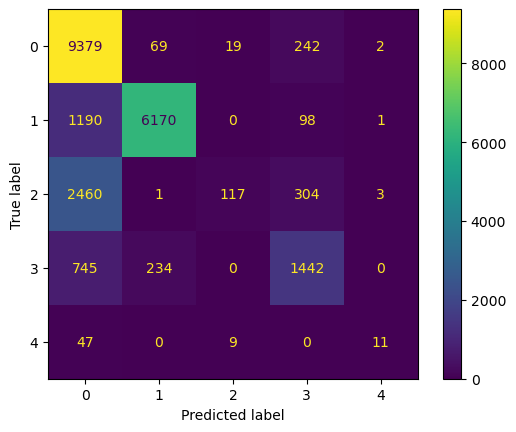

In [42]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

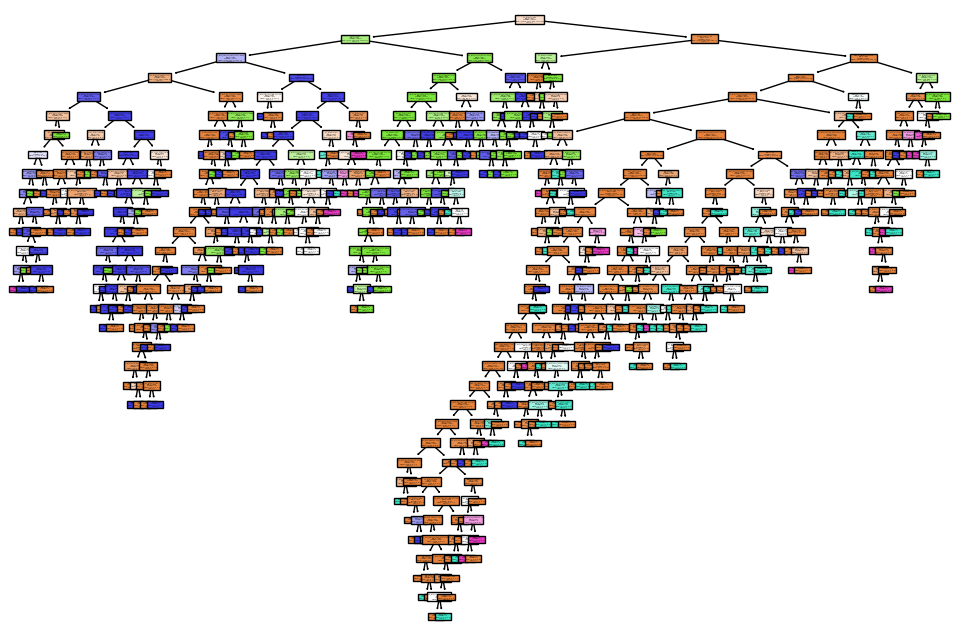

In [44]:
from sklearn import tree
#Affichage de l'arbre de décision graphique
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_classifier, feature_names=X_train.columns, class_names=Y_train.unique().astype(str), filled=True)
plt.show()

B.  KNN  (K­nearest  voisin)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres que vous souhaitez ajuster pour KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Créer le modèle KNN
knn_classifier = KNeighborsClassifier()

# Utiliser GridSearchCV pour rechercher les meilleurs hyperparamètres
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, Y_train)

# Afficher les meilleurs hyperparamètres pour KNN
best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for KNN:", best_params_knn)

